# Case Study #02 - Measures of Central Tendency and Dispersion 

An Institution wishes to find out their student’s ability in maths, reading and
writing skills. The Institution wants to do an exploratory study to check the
following information.
1. Find out how many males and females participated in the test.
2. What do you think about the students' parental level of education?
3. Who scores the most on average for math, reading and writing based on
(● Gender,
● Test preparation course)
4. What do you think about the scoring variation for math, reading and writing
based on
(● Gender,
● Test preparation course)
5. The management needs your help to give bonus points to the top 25% of
students based on their maths score, so how will you help the management
to achieve this.

`Dataset -StudentsPerformance.csv`

In [1]:
#importing pandas,numply,matplotlib.pyplot,seaborn libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset to the python environment
data=pd.read_csv('StudentsPerformance.csv')

In [3]:
#Displaying the columns in the dataset
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [4]:
#displaying  top 5  rows of the dataset
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [5]:
#To know data types of each columns and checking for null values in the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Note-

*It appears that we do not have empty/NaN values in the dataset, as the number of Non-Null counts for each column is equal to 1000, which is exactly the number of rows in the dataset. We also note that our numeric data are already detected as integer values.*

In [6]:
#For easiness,replacing 'space' in column names with '_'
column_names = data.columns
for column in column_names:
    new_name = column.replace(" ","_")
    data.rename(columns={column:new_name},inplace=True)

In [7]:
#Checking new column names
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [8]:
# to know  statistical summary of integer datatype columns 
data.describe()

,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


About our data-

    there are 1000 scores for math, reading and writing;
    all means are very close to each other - between 66 and 68.11;
    all standard deviations are also close - between 14.7 and 15.56;
    while there is a minimum score of 0 for math, for writing minimum is much higher - 10, and for reading - 17.00;
    for all three disciplines the highest score of 100 was achieved at least by one student.


**01.Find out how many males and females participated in the test.**

In [9]:
data.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

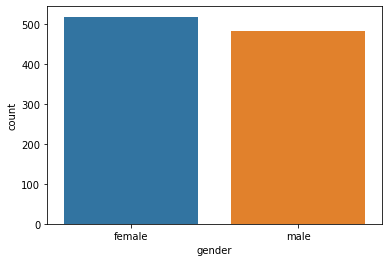

In [10]:
#Countplot graph to know how many males and females participated in the test
sns.countplot(x='gender',data=data)
plt.show()

**02. What do you think about the students' parental level of education?**

In [11]:
#to know how many type of  options  are there for the level of education of the parents
data1=data.parental_level_of_education.value_counts()
data1

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

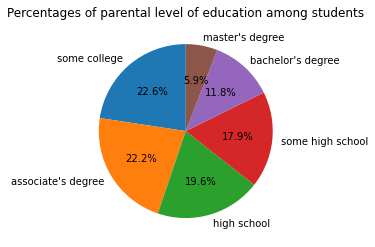

In [12]:
#Pie plot about the students' parental level of education
plt.title("Percentages of parental level of education among students")
plt.pie(data1,labels=data1.index, autopct='%1.1f%%', startangle=90)
plt.show()

Find-

62% of parents have college education and remianing 38% have high school education

In [13]:
#adding a new column to know average score of 3 tests
data['average_score'] = data[['math_score', 'reading_score','writing_score']].mean(axis=1)
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,18.333333
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000
3,female,group B,some college,standard,none,11,38,32,27.000000
4,female,group C,some college,free/reduced,none,22,39,33,31.333333


In [14]:
data.groupby('parental_level_of_education').mean()['average_score'].sort_values()

parental_level_of_education
high school           62.942177
some high school      64.927374
some college          68.576696
associate's degree    69.675676
bachelor's degree     71.889831
master's degree       73.960452
Name: average_score, dtype: float64

Find-

Looking at these values, students of parents with masters and bachelors degrees score on average 7 marks more than those whose children of parents with high school education.

Text(0.5, 1.0, 'Effect of parents education on average score of 3 tests')

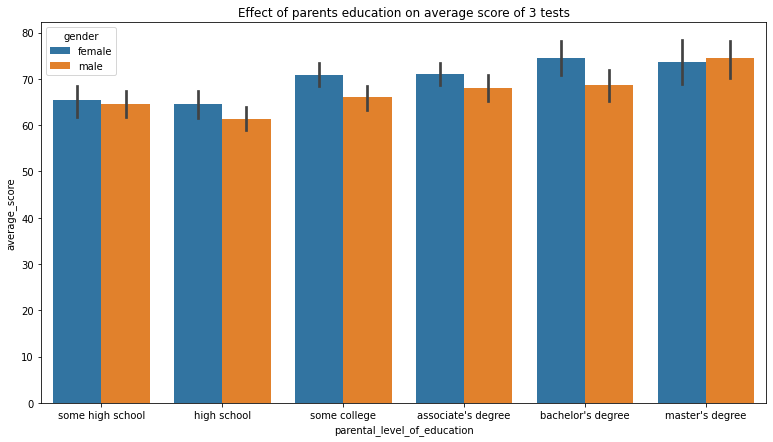

In [19]:
#Barplot graph to know average score of 3 tests of  males and females w.r.t parents education
plt.figure(figsize = (13,7))
sns.barplot(x = "parental_level_of_education", y = "average_score", data = data, hue = 'gender')
plt.title("Effect of parents education on average score of 3 tests")

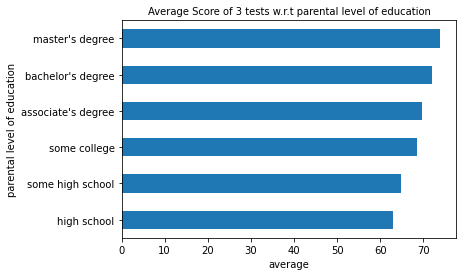

In [20]:
data.groupby('parental_level_of_education').mean()['average_score'].sort_values().plot(kind='barh')
plt.title("Average Score of 3 tests w.r.t parental level of education",fontsize=10)
plt.xlabel("average",fontsize=10)
plt.ylabel("parental level of education",fontsize=10)
plt.show()

Find-

Clearly, children of parent with College education score better overall.  another observation is that children of parents having "some highschool" get more marks than children of parents having "high school". 

**03. Who scores the most on average for math, reading and writing based on**

● Gender

● Test preparation course

<u>Gender<u>

In [39]:
#to know average mark of female and male in math,reading&writing test and also average of 3 test scores
data.groupby('gender')[['math_score', 'reading_score', 'writing_score', 'average_score']].mean().round(1)

,math_score,reading_score,writing_score,average_score
gender,,,,
female,63.4,72.6,72.5,69.5
male,68.8,65.5,63.4,65.9


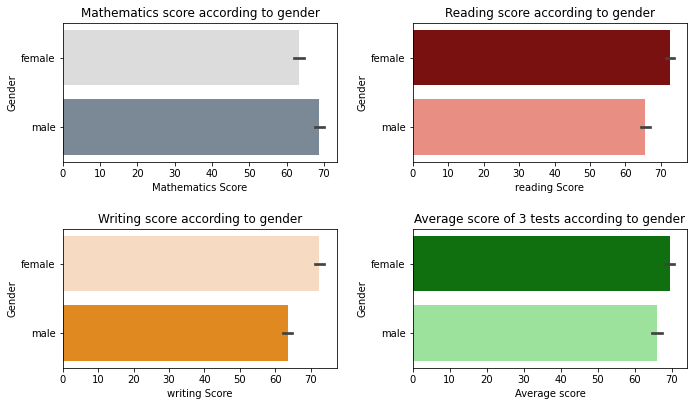

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))


sns.barplot(y='gender', x='math_score', palette=["gainsboro", "lightslategray"], data=data, ax=axes[0,0]);
axes[0,0].set_xlabel('Mathematics Score')
axes[0,0].set_ylabel('Gender')
axes[0,0].set_title("Mathematics score according to gender")

axes[0,1].set_title("Reading score according to gender")
sns.barplot(y='gender', x='reading_score', palette=["darkred", "salmon"], data=data, ax=axes[0,1]);
axes[0,1].set_xlabel('reading Score')
axes[0,1].set_ylabel('Gender')

axes[1,0].set_title("Writing score according to gender")
sns.barplot(y='gender', x='writing_score', palette=["peachpuff", "darkorange"], data=data, ax=axes[1,0]);
axes[1,0].set_xlabel('writing Score')
axes[1,0].set_ylabel('Gender')

axes[1,1].set_title("Average score of 3 tests according to gender")
sns.barplot(y='gender', x='average_score', palette=["g", "lightgreen"], data=data, ax=axes[1,1]);
axes[1,1].set_xlabel('Average score')
axes[1,1].set_ylabel('Gender')


plt.tight_layout(pad=2);

Find-

From graphs we can see ,boys obtained higher marks on the mathematics exam, the female students did better on reading and writing exams and, on average of 3 tests also, received higher marks than male students. 

<u>Test preparation course<u>

In [24]:
#to know average scores of students with test preparation course 
data.groupby('test_preparation_course')[['math_score', 'reading_score', 'writing_score', 'average_score']].mean().round(1)

,math_score,reading_score,writing_score,average_score
test_preparation_course,,,,
completed,70.0,74.2,74.7,72.9
none,63.8,66.4,64.5,64.9


In [25]:
preparation_course = data[data.test_preparation_course == 'none']
preparation_course_none = preparation_course[['math_score', 'reading_score', 'writing_score']].mean().round(1)
preparation_course_none

math_score       63.8
reading_score    66.4
writing_score    64.5
dtype: float64

In [26]:
preparation_course1 = data[data.test_preparation_course == 'completed']
preparation_course = preparation_course1[['math_score', 'reading_score', 'writing_score']].mean().round(1)
preparation_course

math_score       70.0
reading_score    74.2
writing_score    74.7
dtype: float64

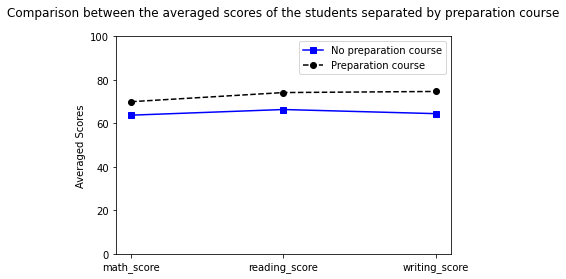

In [27]:
plt.title("Comparison between the averaged scores of the students separated by preparation course", pad=20)

plt.plot(preparation_course_none, 's-b')
plt.plot(preparation_course, 'o--k')
plt.ylabel("Averaged Scores");
plt.ylim(0, 100);
plt.legend(['No preparation course', 'Preparation course']);

Find-

 students that took a preparation course for the exams obtained a higher score on the exams.


**04. What do you think about the scoring variation for math, reading and writing based on**


● Gender

● Test preparation course


<u>Gender<u>

In [31]:
data.groupby(['gender']).agg(['min','median','max','mean'])

math_score                        reading_score                         \
              min median  max       mean           min median  max       mean   
gender                                                                          
female          0     65  100  63.376448            17     73  100  72.590734   
male           27     69  100  68.821577            23     66  100  65.545643   

       writing_score                        average_score                    \
                 min median  max       mean           min     median    max   
gender                                                                        
female            10     74  100  72.467181           9.0  70.333333  100.0   
male              15     64  100  63.446058          23.0  66.833333  100.0   

                   
             mean  
gender             
female  69.478121  
male    65.937759

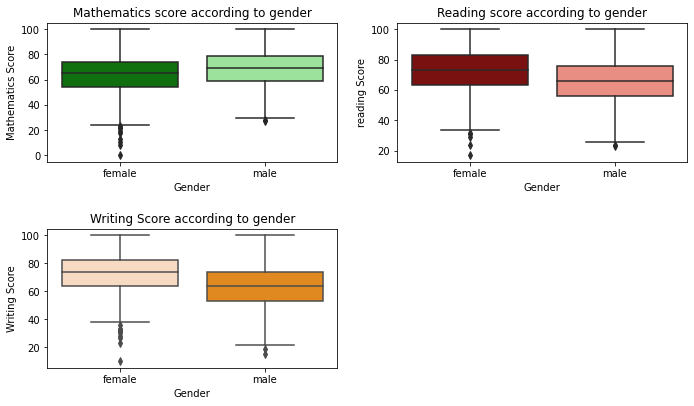

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))


sns.boxplot(x='gender',y='math_score',data=data, palette=["g", "lightgreen"],  ax=axes[0,0]);
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Mathematics Score')
axes[0,0].set_title("Mathematics score according to gender")

sns.boxplot(x='gender',y='reading_score',data=data, palette=["darkred", "salmon"],  ax=axes[0,1]);
axes[0,1].set_xlabel('Gender')
axes[0,1].set_ylabel('reading Score')
axes[0,1].set_title("Reading score according to gender")

sns.boxplot(x='gender',y='writing_score',data=data, palette=["peachpuff", "darkorange"],  ax=axes[1,0]);
axes[1,0].set_xlabel('Gender')
axes[1,0].set_ylabel('Writing Score')
axes[1,0].set_title("Writing Score according to gender")

axes[1,1].set_visible(False)


plt.tight_layout(pad=2);

Find-

* *In maths , minimum score is 0 for female students & 27 for male students.*                                         
                      average is highest for male students

* *In reading test , minimum score is 17 for female students & 23 for male students.*
                     average is highest for female students
* *In writing test , minimum score is 10 for female students & 15 for male students.*
                     average is highest for female students                  
* *for all three disciplines the highest score of 100 was achieved at least by one student.*

<u>Test preparation course<u>

In [33]:
data[['test_preparation_course',
      'gender',
      'math_score',
      'reading_score',
      'writing_score']].groupby(['test_preparation_course']).agg(['min','median','max','mean'])

math_score                       reading_score         \
                               min median  max      mean           min median   
test_preparation_course                                                         
completed                       23     70  100  69.96648            37     75   
none                             0     64  100  63.78972            17     67   

                                        writing_score                         
                         max       mean           min median  max       mean  
test_preparation_course                                                       
completed                100  74.175978            36     76  100  74.684358  
none                     100  66.417445            10     65  100  64.457944

C:\Users\kevin\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 32.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.6% of the points 

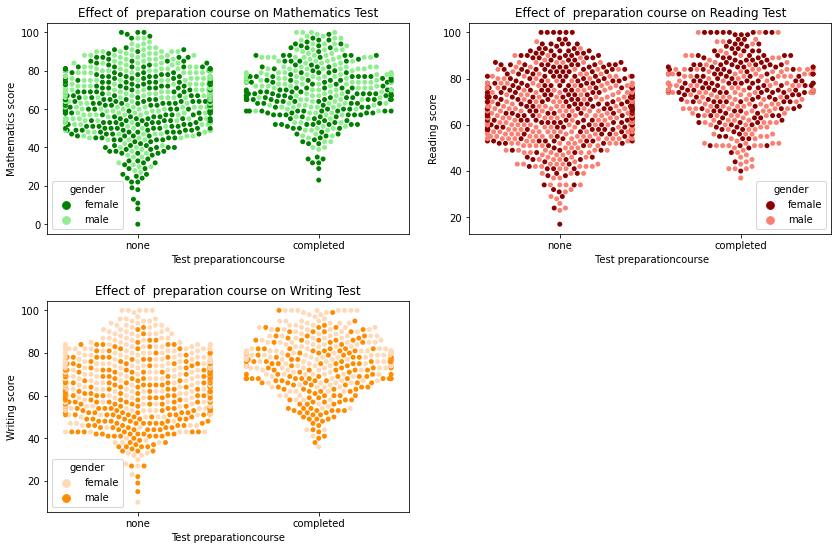

In [34]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))


sns.swarmplot(x='test_preparation_course', y='math_score',hue='gender', data=data,palette=["g", "lightgreen"],  ax=axes[0,0])
axes[0,0].set_xlabel('Test preparationcourse')
axes[0,0].set_ylabel('Mathematics score')
axes[0,0].set_title("Effect of  preparation course on Mathematics Test")

sns.swarmplot(x='test_preparation_course', y='reading_score',hue='gender', data=data,palette=["darkred", "salmon"],  ax=axes[0,1])
axes[0,1].set_xlabel(' Test preparationcourse')
axes[0,1].set_ylabel('Reading score')
axes[0,1].set_title("Effect of  preparation course on Reading Test")

sns.swarmplot(x='test_preparation_course', y='writing_score',hue='gender', data=data,palette=["peachpuff", "darkorange"],  ax=axes[1,0])
axes[1,0].set_xlabel('Test preparationcourse')
axes[1,0].set_ylabel('Writing score')
axes[1,0].set_title("Effect of  preparation course on Writing Test")

axes[1,1].set_visible(False)

plt.tight_layout(pad=2);

Find-

* *Students who completed preparation course ,  minimum score is  23  in maths.*                                 
  *Students who haven't done the preparation course ,  minimum score is  0  in maths.*     
           average is highest for Students who completed preparation course 	
           
* *Students who completed preparation course ,  minimum score is  37  in reading test.*                                 
  *Students who haven't done the preparation course ,  minimum score is  17  in reading test.*     
           average is highest for Students who completed preparation course  
           
* *Students who completed preparation course ,  minimum score is  36  in writing test.*                                 
  *Students who haven't done the preparation course ,  minimum score is  10  in writing test.*     
           average is highest for Students who completed preparation course 

* *for all three disciplines the highest score of 100 was achieved at least by one student.*

**05. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.**

Note-

There are score of 1000 students  in the dataset ,so 25% means 250 students

#Method-1

In [35]:
#displaying top 25% of students in ascending order based on their maths score (ie, score of 250 students)
result=data.sort_values('math_score',ascending=False).head(int(data.shape[0]*.25))
result

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
999,male,group E,bachelor's degree,standard,completed,100,100,100,100.000000
996,male,group A,some college,standard,completed,100,96,86,94.000000
515,female,group E,some college,standard,none,100,92,97,96.333333
517,female,group E,associate's degree,standard,none,100,100,100,100.000000
516,female,group E,bachelor's degree,standard,none,100,100,100,100.000000
...,...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77,76.666667
855,male,group E,associate's degree,free/reduced,completed,77,69,68,71.333333
854,male,group D,some high school,standard,completed,77,68,69,71.333333
853,male,group D,associate's degree,free/reduced,none,77,78,73,76.000000


exporting the top 25% of students based on their maths score to a new excel sheet ,so that management can lookup the file   to give bonus points

In [36]:
result.to_excel('./ top 25%.xlsx')

#Method-2

In [37]:
#displaying top 25% using 'nlargest' function
count_row = int(data.shape[0]*0.25)
result1=data.nlargest(count_row, 'math_score')
result1

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score
515,female,group E,some college,standard,none,100,92,97,96.333333
516,female,group E,bachelor's degree,standard,none,100,100,100,100.000000
517,female,group E,associate's degree,standard,none,100,100,100,100.000000
996,male,group A,some college,standard,completed,100,96,86,94.000000
997,male,group D,some college,standard,completed,100,97,99,98.666667
...,...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86,83.000000
429,female,group E,some high school,standard,none,77,79,80,78.666667
849,male,group A,bachelor's degree,standard,none,77,67,68,70.666667
850,male,group C,associate's degree,free/reduced,none,77,67,64,69.333333


`Submitted by-` 

`Kevin M, DSA Norka B3 2021`